## 1. Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [3]:
#Create a path to where the data is stored.
path = r'/Users/vicky/OneDrive/文件/careerfoundry/Machine Learning with Python/Datasets'

In [4]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [5]:
#Read in the Cleaned European weather data between 2010-2019.
df = pd.read_csv(os.path.join(path,'climate_2010-2019_cleaned.csv'), index_col=0)

In [6]:
df

BASEL_cloud_cover  BASEL_global_radiation  BASEL_humidity  \
18263                  8                    0.18            0.93   
18264                  3                    0.58            0.74   
18265                  3                    0.61            0.75   
18266                  5                    0.48            0.83   
18267                  7                    0.53            0.78   
...                  ...                     ...             ...   
21910                  8                    0.15            0.92   
21911                  7                    0.35            0.86   
21912                  6                    0.61            0.93   
21913                  1                    0.64            0.81   
21914                  5                    0.58            0.87   

       BASEL_precipitation  BASEL_pressure  BASEL_sunshine  BASEL_temp_max  \
18263                 0.56          0.9965             0.0             4.8   
18264                 0.00          1.0193             5.2             0.4   
18265                 0.00          1.0226             6.3             1.1   
18266                 0.00          1.0169             3.7            -3.1   
18267                 0.04          1.0073             4.4            -1.5   
...                    ...             ...             ...             ...   
21910                 0.52          1.0273             0.1             7.9   
21911                 0.00          1.0380             1.3             5.7   
21912                 0.00          1.0387             4.9             2.6   
21913                 0.00          1.0354             6.5             5.1   
21914                 0.00          1.0350             3.5             3.5   

       BASEL_temp_mean  BASEL_temp_min  BELGRADE_cloud_cover  ...  \
18263              2.9            -0.2                     6  ...   
18264             -1.5            -4.2                     8  ...   
18265             -3.2            -6.0                     7  ...   
18266             -4.9            -8.3                     2  ...   
18267             -4.0            -7.1                     6  ...   
...                ...             ...                   ...  ...   
21910              6.8             5.6                     5  ...   
21911              3.7            -0.6                     8  ...   
21912             -0.8            -2.7                     8  ...   
21913              0.5            -3.0                     6  ...   
21914              0.4            -1.3                     2  ...   

       VALENTIA_cloud_cover  VALENTIA_global_radiation  VALENTIA_humidity  \
18263                     1                       0.43               0.80   
18264                     1                       0.45               0.82   
18265                     4                       0.36               0.71   
18266                     2                       0.48               0.67   
18267                     4                       0.45               0.78   
...                     ...                        ...                ...   
21910                     5                       0.04               0.82   
21911                     5                       0.20               0.82   
21912                     5                       0.24               0.82   
21913                     5                       0.06               0.82   
21914                     5                       0.10               0.82   

       VALENTIA_precipitation  VALENTIA_pressure  VALENTIA_sunshine  \
18263                    0.00             1.0121                6.0   
18264                    0.00             1.0196                6.0   
18265                    0.41             1.0196                1.6   
18266                    0.51             1.0219                6.5   
18267                    0.09             1.0117                4.7   
...                       ...                ...                ...   
21

In [7]:
#Read in the pleasant weather data between 2010-2019.
pleasant = pd.read_csv(os.path.join(path,'pleasant_2010-2019.csv'), index_col=0)
pleasant

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  2010-01-01                       0                          0   
18264  2010-01-02                       0                          0   
18265  2010-01-03                       0                          0   
18266  2010-01-04                       0                          0   
18267  2010-01-05                       0                          0   
...           ...                     ...                        ...   
21910  2019-12-27                       0                          0   
21911  2019-12-28                       0                          0   
21912  2019-12-29                       0                          0   
21913  2019-12-30                       0                          0   
21914  2019-12-31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264         

In [8]:
X = df.drop(['DATE'], axis=1)
y = pleasant.drop(['DATE'], axis=1)
print(X.shape)
print(y.shape)

(3652, 135)
(3652, 15)


## 2. Build Random Forse Model

In [9]:
# List of weather stations
weather_stations = [
    'BASEL_',
    'BELGRADE_',
    'BUDAPEST_',
    'DEBILT_',
    'DUSSELDORF_',
    'HEATHROW_',
    'KASSEL_',
    'LJUBLJANA_',
    'MAASTRICHT_',
    'MADRID_',
    'MUNCHENB_',
    'OSLO_',
    'SONNBLICK_',
    'STOCKHOLM_',
    'VALENTIA_']

In [10]:
# Dictionary mapping Each weather station result for confusion matrix
Weather_outcomes = {
    0: 'BASEL_pleasant_weather',
    1: 'BELGRADE_pleasant_weather',
    2: 'BUDAPEST_pleasant_weather',
    3: 'DEBILT_pleasant_weather',
    4: 'DUSSELDORF_pleasant_weather',
    5: 'HEATHROW_pleasant_weather',
    6: 'KASSEL_pleasant_weather',
    7: 'LJUBLJANA_pleasant_weather',
    8: 'MAASTRICHT_pleasant_weather',
    9: 'MADRID_pleasant_weather',
    10: 'MUNCHENB_pleasant_weather',
    11: 'OSLO_pleasant_weather',
    12: 'SONNBLICK_pleasant_weather',
    13: 'STOCKHOLM_pleasant_weather',
    14: 'VALENTIA_pleasant_weather'}

In [11]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921, 15)
(731, 135) (731, 15)


In [13]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6019151846785226


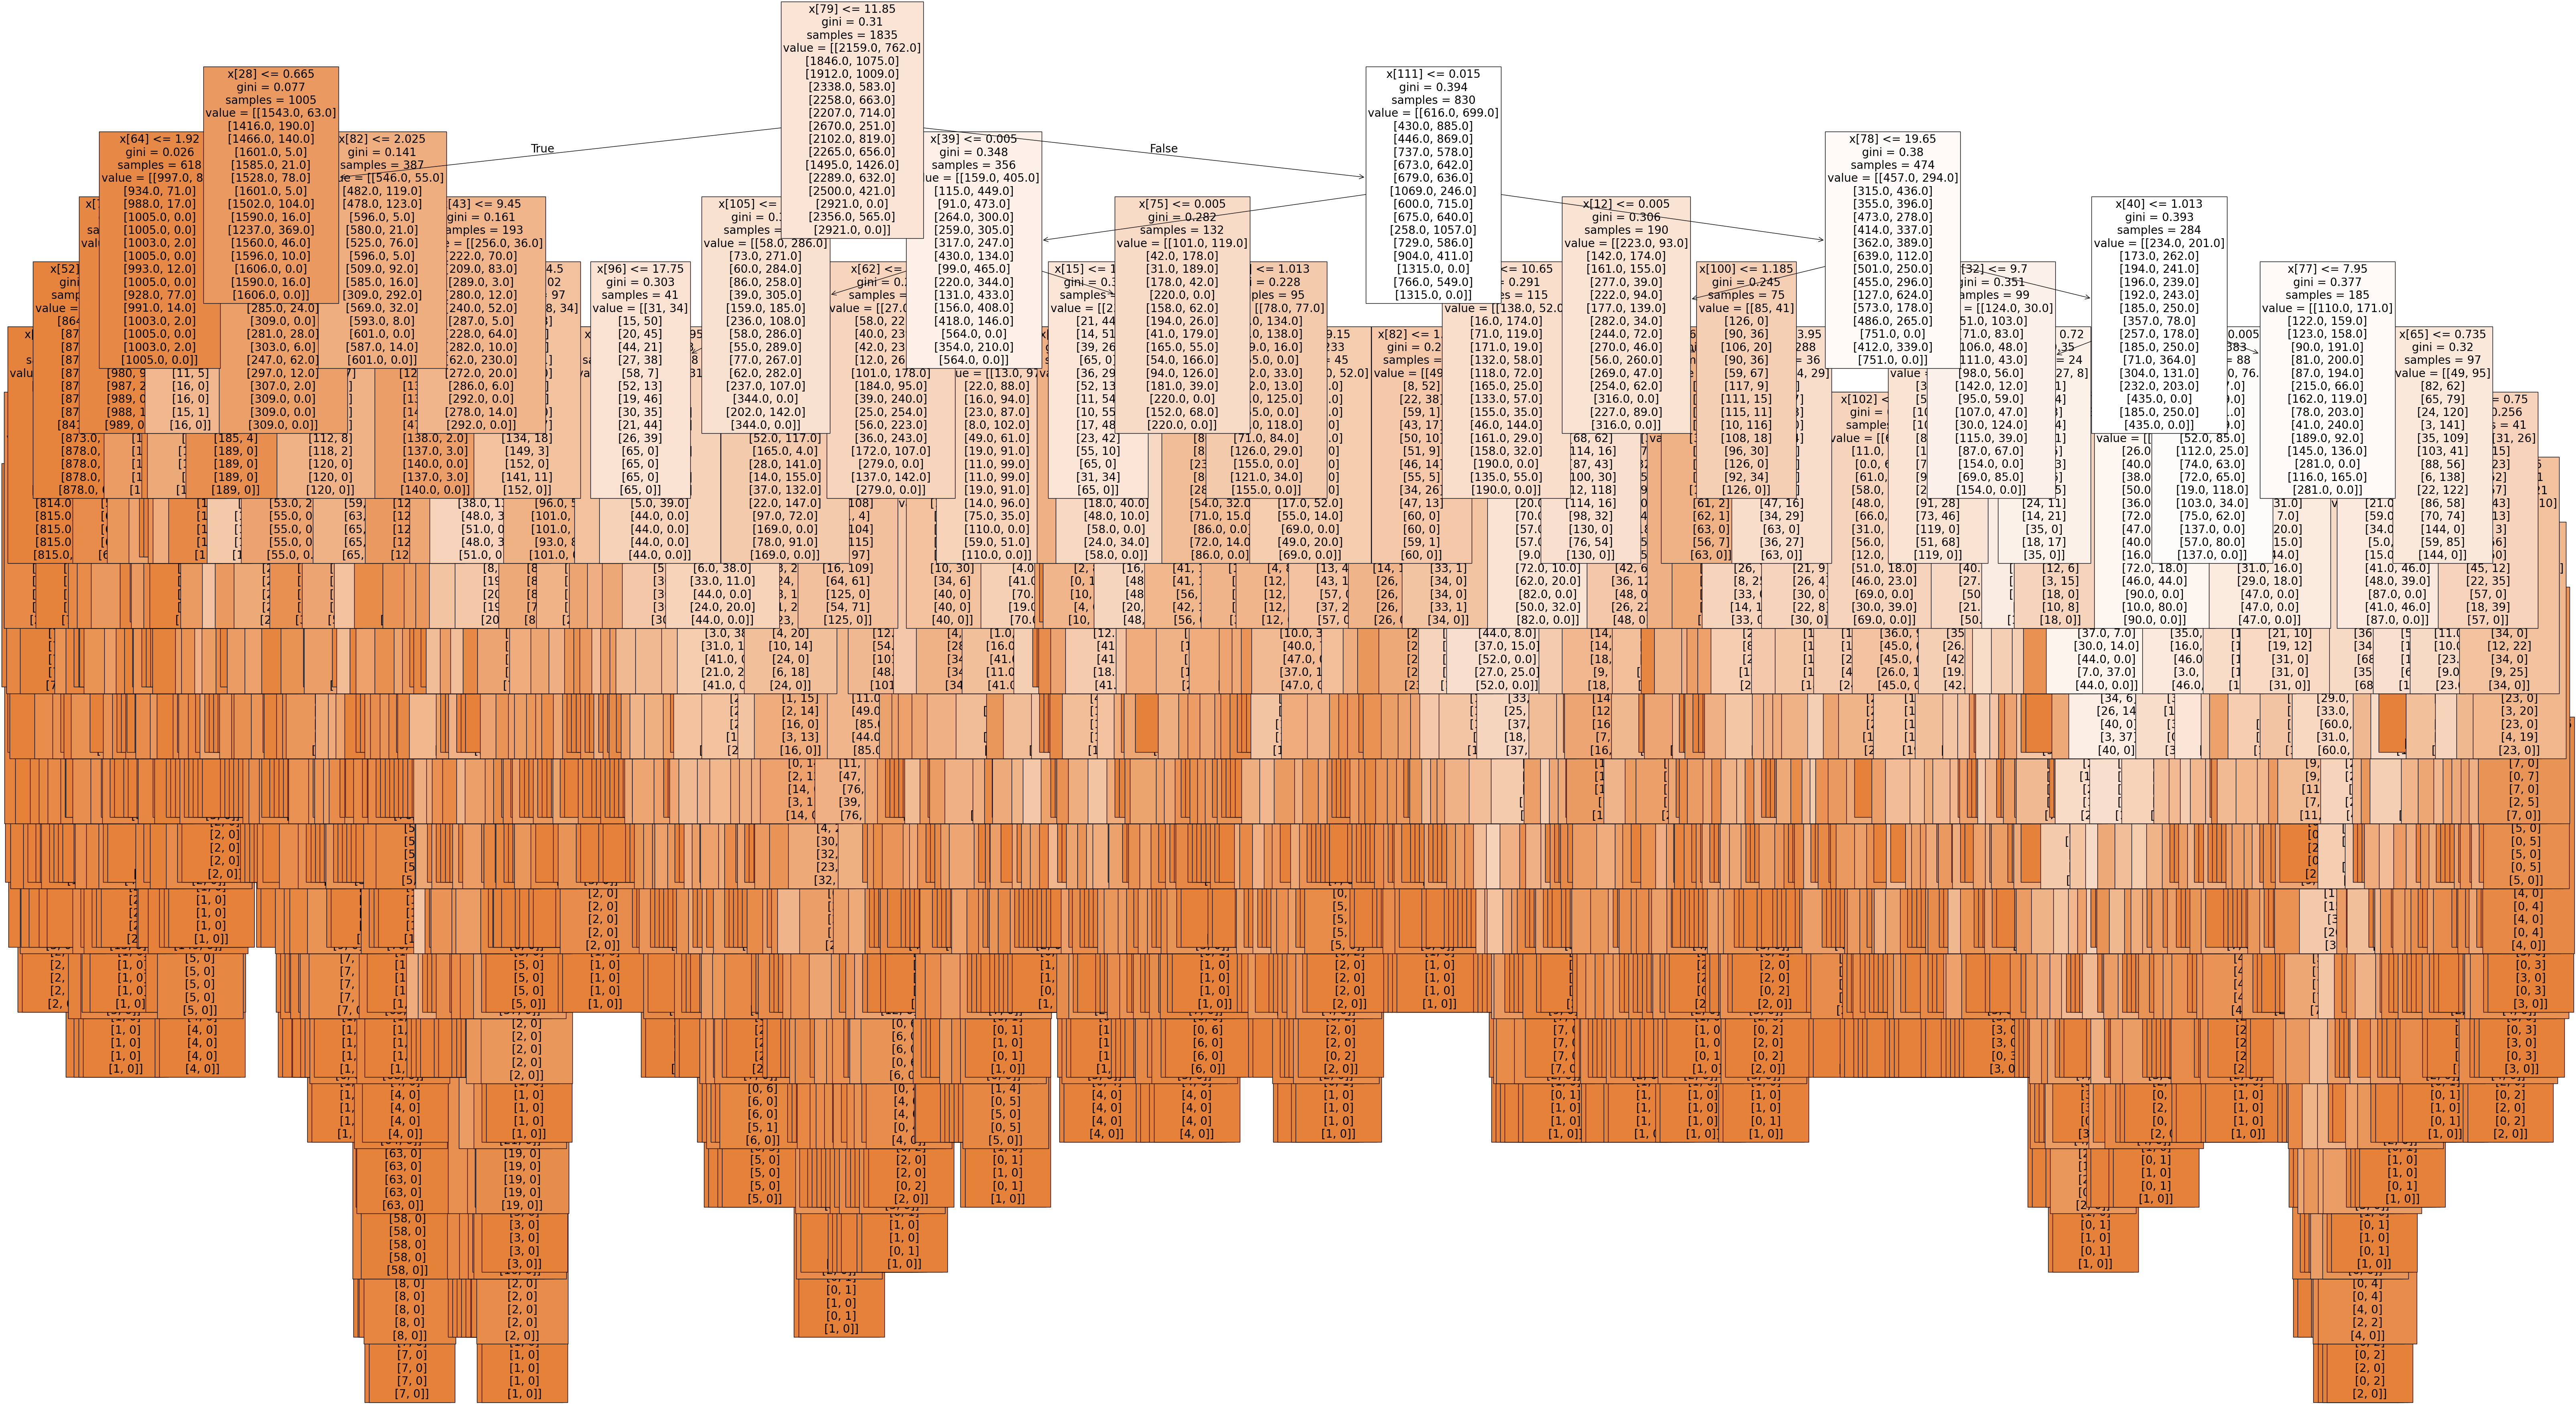

In [15]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=Weather_outcomes, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [16]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.10482091e-03, 3.64723466e-03, 3.21252229e-03, 1.80170027e-02,
       3.55199085e-03, 9.73749151e-03, 3.14624446e-02, 1.94728584e-02,
       1.06437143e-02, 3.52485106e-03, 2.89471944e-03, 3.62073261e-03,
       1.81958976e-02, 3.79376382e-03, 3.06987729e-03, 6.89591230e-03,
       5.70217080e-03, 3.72574953e-03, 3.13748235e-04, 1.44663082e-03,
       0.00000000e+00, 1.64898641e-02, 0.00000000e+00, 1.40514493e-03,
       1.78028541e-02, 1.89761347e-02, 5.94447835e-03, 2.15778891e-03,
       4.62811220e-03, 3.14515365e-03, 1.75760104e-02, 4.83090401e-03,
       4.68432513e-03, 3.54927521e-02, 1.90687181e-02, 2.93516806e-03,
       2.43281044e-03, 3.70741422e-03, 3.30734474e-03, 1.62103978e-02,
       5.38983302e-03, 9.04456703e-03, 4.70048678e-02, 2.37635142e-02,
       3.32376227e-03, 2.35324236e-03, 4.52734512e-03, 4.06837103e-03,
       8.96806963e-03, 4.10652233e-03, 4.56654311e-03, 1.67231157e-02,
       7.52246389e-03, 3.00037585e-03, 3.69259958e-03, 3.36954201e-03,
      

In [17]:
np.set_printoptions(threshold=1000)

In [18]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.10482091e-03, 3.64723466e-03, 3.21252229e-03, 1.80170027e-02,
         3.55199085e-03, 9.73749151e-03, 3.14624446e-02, 1.94728584e-02,
         1.06437143e-02],
        [3.52485106e-03, 2.89471944e-03, 3.62073261e-03, 1.81958976e-02,
         3.79376382e-03, 3.06987729e-03, 6.89591230e-03, 5.70217080e-03,
         3.72574953e-03],
        [3.13748235e-04, 1.44663082e-03, 0.00000000e+00, 1.64898641e-02,
         0.00000000e+00, 1.40514493e-03, 1.78028541e-02, 1.89761347e-02,
         5.94447835e-03],
        [2.15778891e-03, 4.62811220e-03, 3.14515365e-03, 1.75760104e-02,
         4.83090401e-03, 4.68432513e-03, 3.54927521e-02, 1.90687181e-02,
         2.93516806e-03],
        [2.43281044e-03, 3.70741422e-03, 3.30734474e-03, 1.62103978e-02,
         5.38983302e-03, 9.04456703e-03, 4.70048678e-02, 2.37635142e-02,
         3.32376227e-03],
        [2.35324236e-03, 4.52734512e-03, 4.06837103e-03, 8.96806963e-03,
         4.10652233e-03, 4.56654311e-03, 1.67231157e-02, 7.52246389

In [19]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.10285008, 0.05142367, 0.06237886, 0.09451893, 0.11418451,
       0.05583605, 0.02937571, 0.10045874, 0.10581419, 0.05966272,
       0.07177545, 0.0552173 , 0.03374086, 0.05851957, 0.00424336])

In [20]:
important = pd.Series(sumarray, index = weather_stations) #.sort_values(ascending = False)
important

BASEL_         0.102850
BELGRADE_      0.051424
BUDAPEST_      0.062379
DEBILT_        0.094519
DUSSELDORF_    0.114185
HEATHROW_      0.055836
KASSEL_        0.029376
LJUBLJANA_     0.100459
MAASTRICHT_    0.105814
MADRID_        0.059663
MUNCHENB_      0.071775
OSLO_          0.055217
SONNBLICK_     0.033741
STOCKHOLM_     0.058520
VALENTIA_      0.004243
dtype: float64

['BASEL_', 'BELGRADE_', 'BUDAPEST_', 'DEBILT_', 'DUSSELDORF_', 'HEATHROW_', 'KASSEL_', 'LJUBLJANA_', 'MAASTRICHT_', 'MADRID_', 'MUNCHENB_', 'OSLO_', 'SONNBLICK_', 'STOCKHOLM_', 'VALENTIA_']


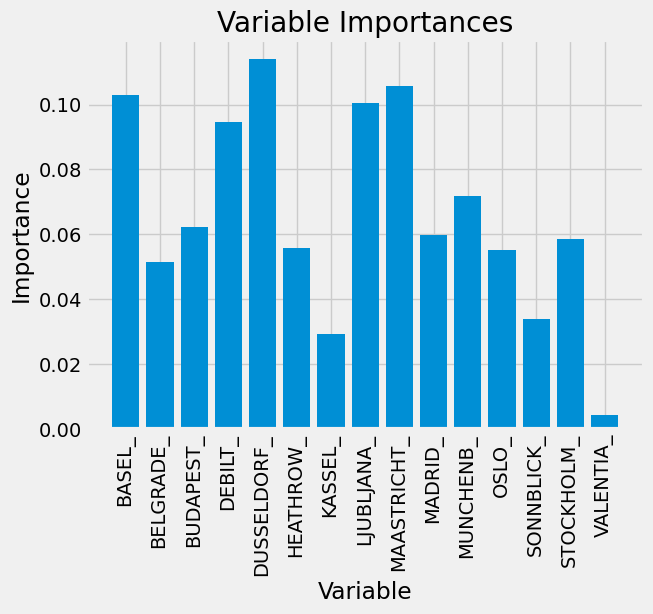

In [21]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather_stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather_stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## 3. Grid Search

In [22]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [23]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vicky\anaconda3\Lib\site-packa

Search took 2.0982425173123675 minutes


In [24]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.5436452246240555


Questions to consult Stephen that the search score is 0.54 which  is lower than the original Model Accuracy:  0.5978

## 4. RANDOM SEARCH

In [25]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [26]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [27]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 6.001779540379842 minutes


In [28]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 80, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 460}
Best RANDOM search score is: 0.5330346459119005


## 5. creating a RF classifier with the best results from above

In [38]:
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=7, min_samples_split=3)

In [39]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5512995896032832


Questions to consult Stephen that the search score is 0.55 which is lower than the original Model Accuracy: 0.5978

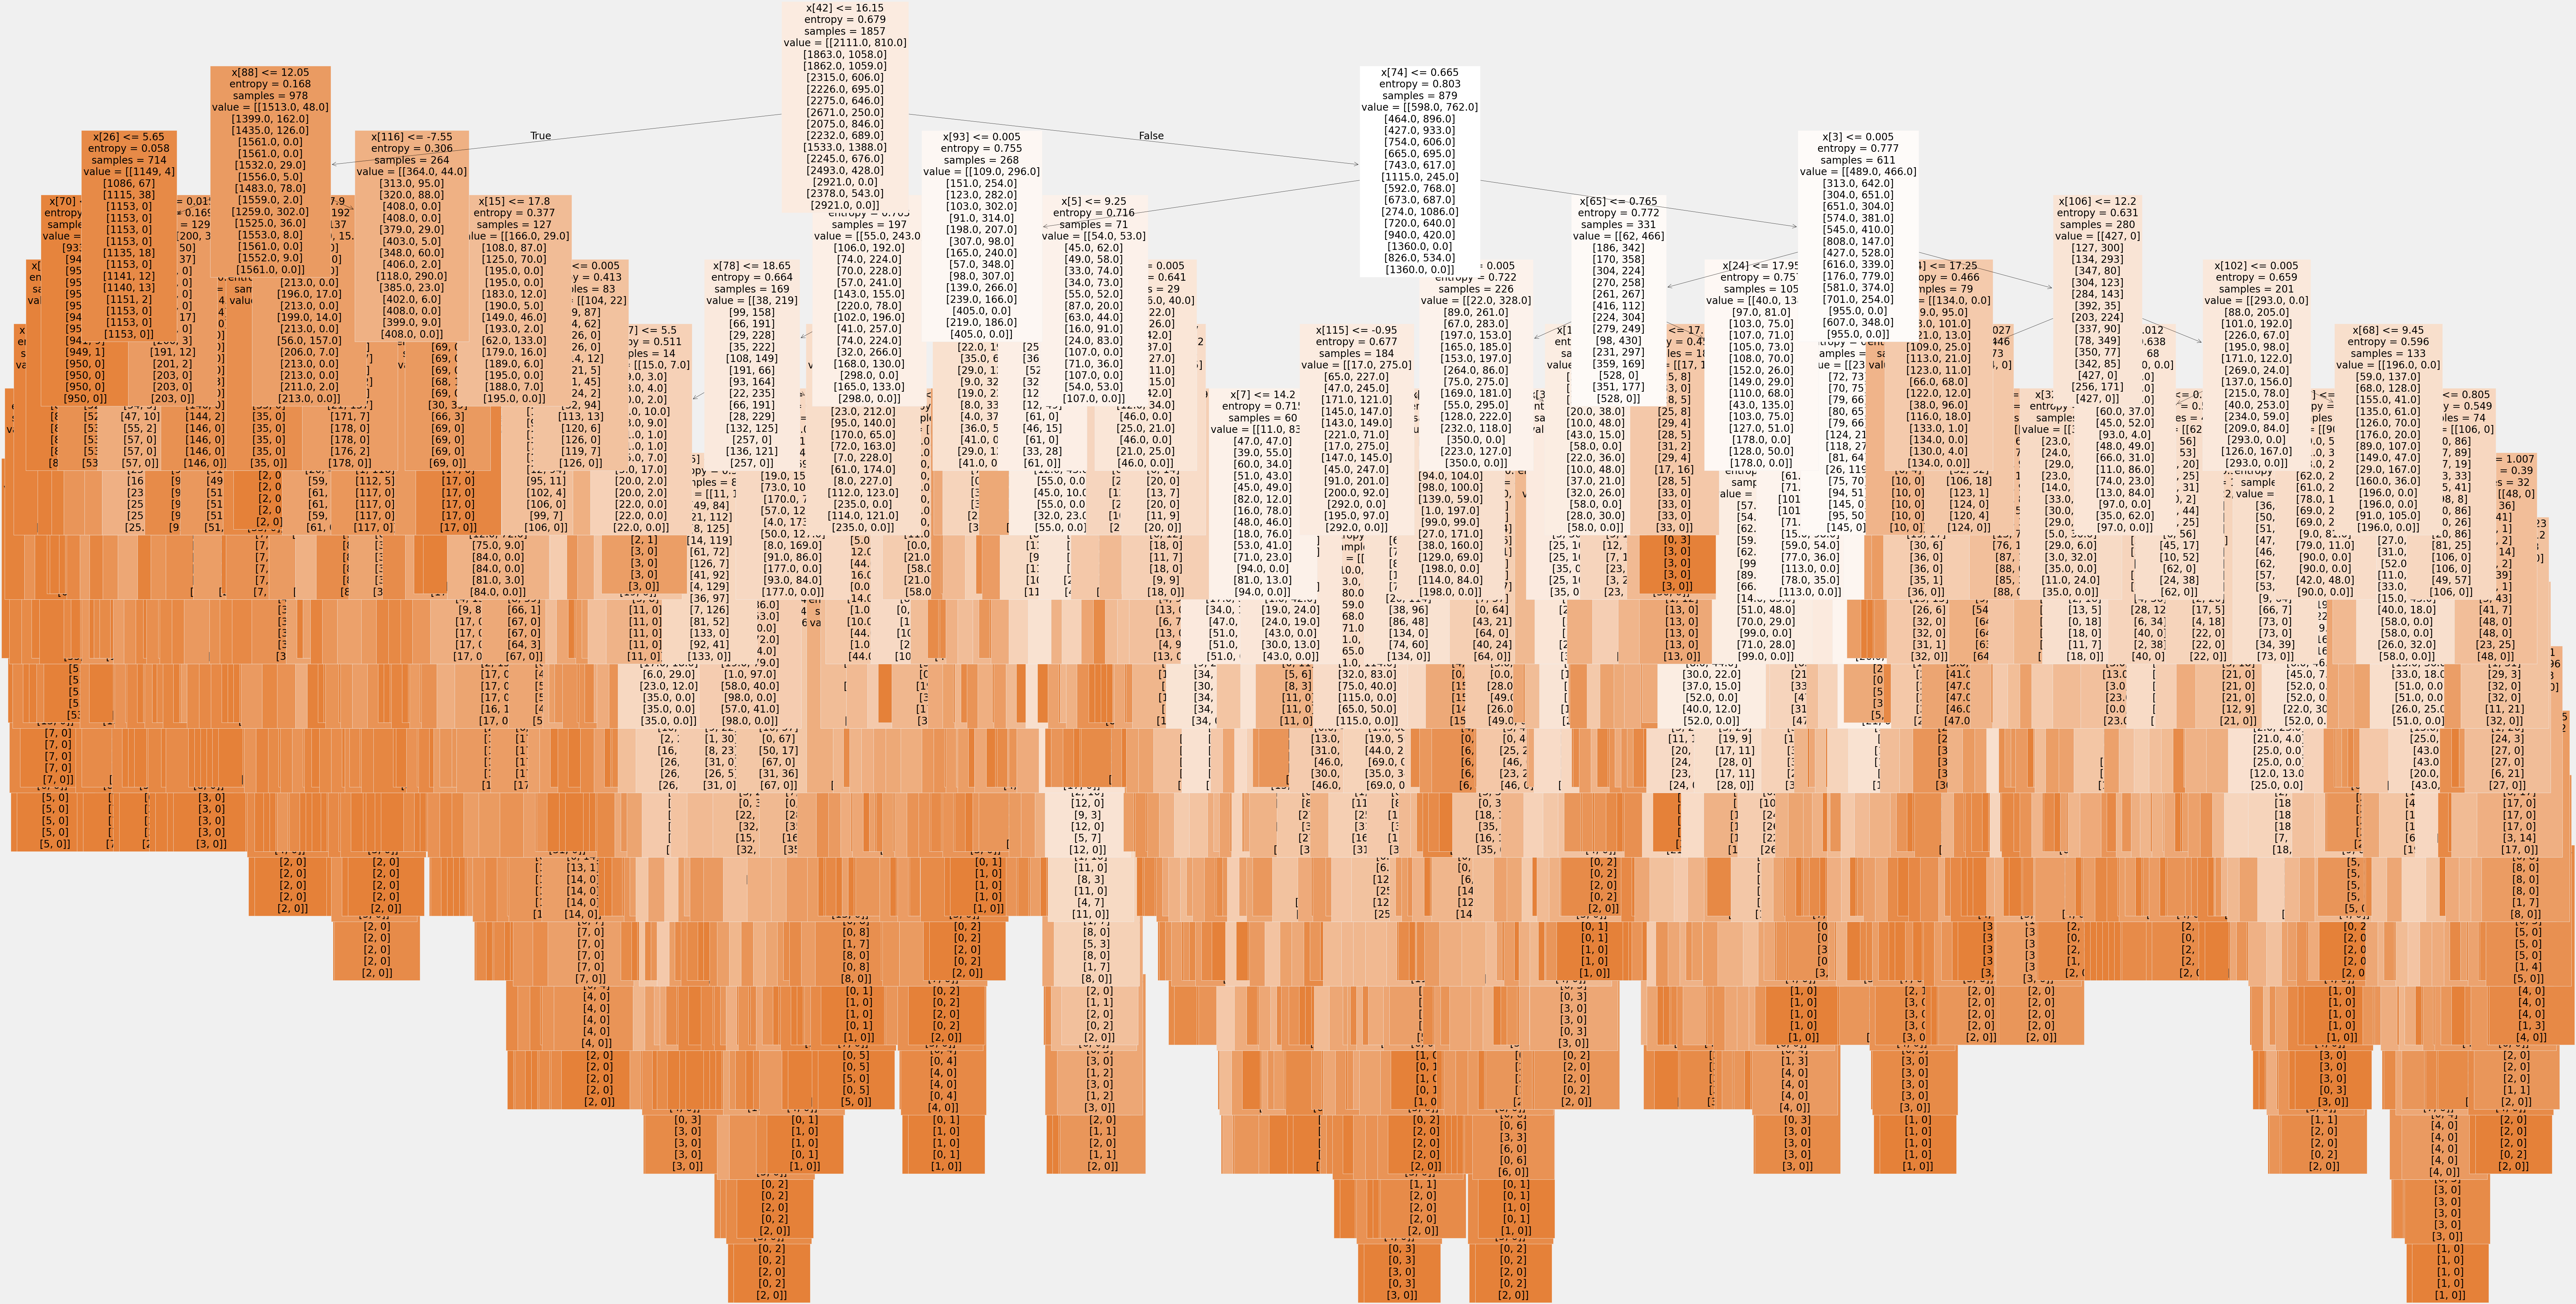

In [31]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[10], fontsize = 20, class_names=Weather_outcomes, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [32]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([2.90128869e-03, 4.39144933e-03, 3.83644212e-03, 1.47869362e-02,
       3.69540625e-03, 8.91699612e-03, 2.23787195e-02, 1.72777033e-02,
       4.42371310e-03, 3.62141217e-03, 3.71669228e-03, 3.63154685e-03,
       1.45183116e-02, 4.21692429e-03, 4.28597409e-03, 1.45106490e-02,
       1.11889404e-02, 6.23585660e-03, 2.69017993e-04, 1.46470911e-03,
       0.00000000e+00, 1.24698507e-02, 0.00000000e+00, 1.49155933e-03,
       2.39842359e-02, 1.33644663e-02, 9.71415737e-03, 2.82990986e-03,
       5.44447437e-03, 3.59426693e-03, 1.21755757e-02, 4.61775940e-03,
       4.98564335e-03, 3.47585743e-02, 1.51270101e-02, 2.91953637e-03,
       3.11504478e-03, 5.49088543e-03, 4.30512210e-03, 1.53341276e-02,
       5.28542284e-03, 6.02891297e-03, 3.41107587e-02, 1.35349638e-02,
       3.21743310e-03, 2.72804517e-03, 5.16308350e-03, 3.98253194e-03,
       8.25383104e-03, 3.67385253e-03, 4.19157403e-03, 1.73933395e-02,
       1.10232420e-02, 3.30370347e-03, 3.68722112e-03, 2.94887795e-03,
      

In [33]:
np.set_printoptions(threshold=1000)

In [34]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[2.90128869e-03, 4.39144933e-03, 3.83644212e-03, 1.47869362e-02,
         3.69540625e-03, 8.91699612e-03, 2.23787195e-02, 1.72777033e-02,
         4.42371310e-03],
        [3.62141217e-03, 3.71669228e-03, 3.63154685e-03, 1.45183116e-02,
         4.21692429e-03, 4.28597409e-03, 1.45106490e-02, 1.11889404e-02,
         6.23585660e-03],
        [2.69017993e-04, 1.46470911e-03, 0.00000000e+00, 1.24698507e-02,
         0.00000000e+00, 1.49155933e-03, 2.39842359e-02, 1.33644663e-02,
         9.71415737e-03],
        [2.82990986e-03, 5.44447437e-03, 3.59426693e-03, 1.21755757e-02,
         4.61775940e-03, 4.98564335e-03, 3.47585743e-02, 1.51270101e-02,
         2.91953637e-03],
        [3.11504478e-03, 5.49088543e-03, 4.30512210e-03, 1.53341276e-02,
         5.28542284e-03, 6.02891297e-03, 3.41107587e-02, 1.35349638e-02,
         3.21743310e-03],
        [2.72804517e-03, 5.16308350e-03, 3.98253194e-03, 8.25383104e-03,
         3.67385253e-03, 4.19157403e-03, 1.73933395e-02, 1.10232420

In [35]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.08260865, 0.06592631, 0.062758  , 0.08645275, 0.09042267,
       0.0597132 , 0.03059507, 0.08439039, 0.11064818, 0.06062236,
       0.0840954 , 0.06632016, 0.04524292, 0.06595624, 0.00424769])

In [36]:
important = pd.Series(sumarray, index = weather_stations) #.sort_values(ascending = False)
important

BASEL_         0.082609
BELGRADE_      0.065926
BUDAPEST_      0.062758
DEBILT_        0.086453
DUSSELDORF_    0.090423
HEATHROW_      0.059713
KASSEL_        0.030595
LJUBLJANA_     0.084390
MAASTRICHT_    0.110648
MADRID_        0.060622
MUNCHENB_      0.084095
OSLO_          0.066320
SONNBLICK_     0.045243
STOCKHOLM_     0.065956
VALENTIA_      0.004248
dtype: float64

['BASEL_', 'BELGRADE_', 'BUDAPEST_', 'DEBILT_', 'DUSSELDORF_', 'HEATHROW_', 'KASSEL_', 'LJUBLJANA_', 'MAASTRICHT_', 'MADRID_', 'MUNCHENB_', 'OSLO_', 'SONNBLICK_', 'STOCKHOLM_', 'VALENTIA_']


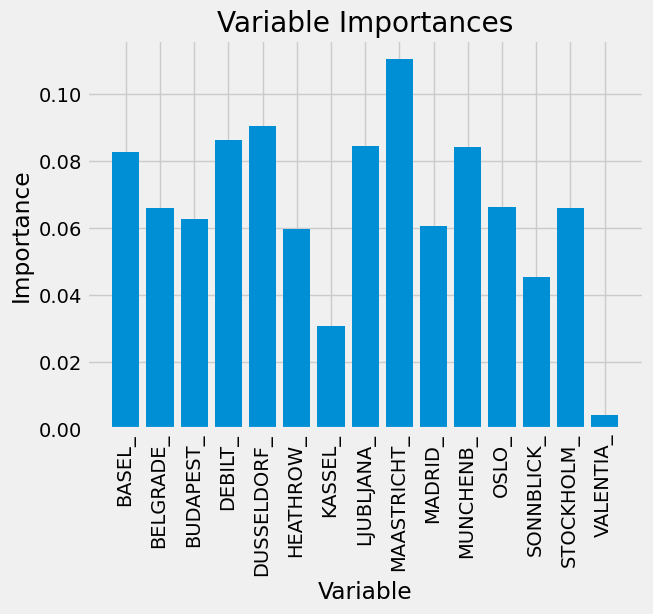

In [37]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather_stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather_stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');